## **Assignment 1: Descriptive statistics and cell morphology**

### **How to complete and submit this assignment**

**If you haven't already, make a copy of this notebook to your google drive:** 


> Select File by the title and Colab logo &rarr; Save a Copy in Drive. 

> A new notebook with the title "Copy of Assignment 1" should open - and you can start working on this assignment!

Read all text in this notebook carefully as you progress through it. Whenever you see text under the heading "**task**", you will be required to perform some action (run code, write some code of your own, or provide a written response to a question by editing a Markdown cell). Whenever you are required to write some of your own code, you will see three dots ("..."). Delete these dots and enter your code.
<br>
<br>
The assignment is worth 100 points total - the number of points for each task is indicated in parantheses. 
<br>
<br>
When you are finished, select file &rarr; print and save the notebook as a PDF. You will then upload this PDF to Canvas as Assignment 1.




### **Background**

In this assignment, you will examind the question: **how does the morphology of a neuron (i.e. its physical structure) differ based on whether the neurons release a neurotransmitter that *excites* or *inhibits* their targets?**
<br>

Interestingly, research has found that excitatory neurons versus inhibitory neurons in the cerebral cortex have distinct morphologies in a few key ways. For instance, excitatory neurons typically send their axons very widely in the cerebral cortex, or even outside of the cortex to other brain regions. Inhibitory neurons typically have axons and dendrites that remain close to their soma. Excitatory neurons typically have a lot of spines on their dendrites – and are thus referred to as **spiny** neurons. The role of spines is complex, but importantly, they are often the site of excitatory input synapses. On the other hand, inhibitory neurons have far fewer or no spines on their dendrites, giving them a smooth appearance. Inhibitory neurons are thus referred to as **aspiny** neurons.
<br>

How can we easily classify the morphology of a neuron? Textbooks originally classified neurons as being bipolar, unipolar and multipolar cells, based on the overall shape. However, for most scientific purposes, this is not a detailed enough classification of morphology. For example, the two neurons below could both be defined as multipolar, but you can clearly see their structures are very different from each other.
<br>

![][image1]

[image1]: <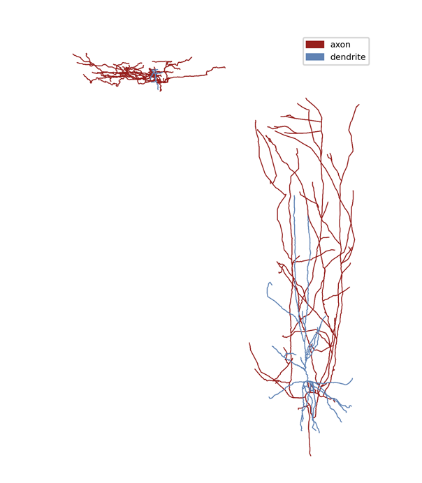>

<br>

Your nervous system performs many complex functions; therefore, it makes sense that the neurons involved also have complex structures. Throughout all biology, function and structure are intertwined.
<br>

Rather than traditional classifications of morphology (bipolar, unipolar and multipolar), in this assignment, we’ll examine how a neuron’s morphology varies in two important ways: 

1. The maximum distance an axon or dendrite extends away from the soma
2. the number of times an axon/dendrite branches into two (or "bifurcates")

### **Structure of Assignment**

- **TODO** add the contents of part 1 and 2 with links


#### **Part 1: Set up coding enviornment**

**Install the AllenSDK**
<br>

The Allen Institute has created a set of code and tools called a Software Development Kit (SDK). These tools will help us import and analyze the cell types data. See Technical Notes at the end of this notebook for more information about working with the AllenSDK.
<br>

> **Task [0 point]:**  Run the cell below, which will install the allensdk into your coding enviornment.

**Note:** After importing the AllenSDK, Colab will prompt you to restart Runtime. Click the **Restart Runtime** button (nothing will happen), and then you're ready to proceed.

In [ ]:
# This will ensure that the AllenSDK is installed
try: 
    import allensdk
    print('allensdk imported')
except ImportError as e:
    %pip install allensdk

Now that we’ve imported the AllenSDK, we also need to import a set of tools called CellTypesCache within the SDK that will allow us to pull information directly from the cell types database. 
<br>

> **Task [0 points]:** Run the cell below.

In [ ]:
# Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

# Initialize the cache as 'ctc' (cell types chache) 
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('CellTypesCache imported.')

**Install and import common packages** 
<br>

> **Task [0 points]:** We also need to make sure that our coding enviornment has __[NumPy](https://numpy.org/)__, __[Pandas](https://pandas.pydata.org/)__, and __[Matplotlib](https://matplotlib.org/)__ already installed. Run the cell below -- any pacakages that are missing will be installed for you

In [ ]:
# this will ensure that NumPy, Pandas, and Matplotlib are installed.

try: 
    import numpy
    print("numpy already installed")
except ImportError as e: 
    %pip install numpy

try: 
    import pandas
    print("pandas already installed")
except ImportError as e: 
    %pip install pandas

try: 
    import matplotlib
    print("matplotlib already installed")
except ImportError as e: 
    %pip install matplotlib

Below, we'll import a common selection of packages that will help us analyze and plot our data. We'll also configure the plotting in our notebook.

> **Task [2 points]:** Time for you to write some code! Just like you did in the __[Introduction to Juypter Notebook](https://colab.research.google.com/github/nsankaran-usf/NEURO201/blob/main/In-class%20Activities/Introduction%20to%20Jupyter%20Notebook.ipynb)__, import the numpy module nicknamed as np. Add a print message at the end that says "Packages imported!" so that you know the code ran. Add your code underneath the appropriate coments below.

In [ ]:
# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import pandas for working with databases
import pandas as pd 

# Import numpy below
...

# Add your print() statement below
...

#### **Part 2: Morphology of single cells** 

Now that we’ve imported all the tools needed, let’s get down to business! Let’s use the AllenSDK to visually inspect the morphology of a spiny neuron and an aspiny neuron. 
<br>

**Visit the Cell Types Database to get cell IDs** 
<br>

Start by visiting the __[Allen Cell Types Database Search](https://celltypes.brain-map.org/data)__ to access the searchable interface (as you did in lecture). You should see the following panel.
<br>

![][image1]

[image1]: <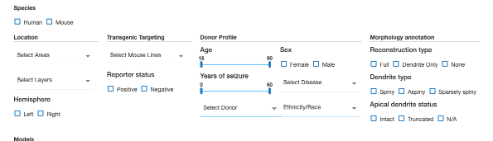>

<br>
As you might expect, the morphology of a neuron varies greatly across model organisms (e.g., human vs. mouse), brain region, and cortical layer. In order to isolate the morphological differences between spiny/aspiny neurons, we need to keep these other variables fixed. So let’s filter our search. 
<br>

Select **Human** neurons in **layer 3** of the **MTG**. Also select "**Full**" under "Reconstruction type" to ensure we only list neurons within the database that have a morphological reconstruction.
<br>

You should see that the filtered criteria have left us with a dataset of 53 neurons
<br>
(scroll down below the panel to see the results).
<br>

Find the cell ID of one spiny and one aspiny neuron whose morphologies you would like to plot (the cell ID for each neuron is listed as part of the search results in light grey font). 
<br>

**Plot the single cell morphologies** 
<br>

First, let's plot the morphology of the spiny neuron you selected

> **Task [5 points]:** Enter the Cell ID below for a **spiny** neuron and then run this code block. Note that it may take several minutes for the cell to run (possibly longer over a slow internet connection)

In [ ]:
# Enter your spiny neuron’s cell_id below (delete the “...”)
cell_id = ...

# Import necessary toolbox
from allensdk.core.swc import Marker

# Download and open morphology and marker files
morphology = ctc.get_reconstruction(cell_id) 
markers = ctc.get_reconstruction_markers(cell_id) 

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in morphology.compartment_list:
    for c in morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')


axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
plt.show()


> **Task [5 points]:** Enter the Cell ID below for an **aspiny** neuron and then run this code block. Note that it may take several minutes for the cell to run (possibly longer over a slow internet connection0. 

In [ ]:
# Enter your aspiny neuron’s cell_id below (delete the “...”)
cell_id = ...

# Import necessary toolbox
from allensdk.core.swc import Marker

# Download and open morphology and marker files
morphology = ctc.get_reconstruction(cell_id) 
markers = ctc.get_reconstruction_markers(cell_id) 

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in morphology.compartment_list:
    for c in morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')


axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
plt.show()

Describe the morphologies (the overall shape and structure) of your spiny and aspiny neurons, taking note of how they extend along the X,Y, and Z axis!  How do they compare with one another in terms of the maximum distance they span and in terms of the number of visible branches? Given what we said about typical differences between excitatory vs. inhibitory neurons, are these differences what you would expect? 
<br>

> **Task [20 points]:** Write your answer to the above questions by editing the markdown cell below.

**Write your answer here (100 - 150 words):**


#### **Part 3: Morphology of many cells (using descriptive stats)**

Now that we’ve examined single neurons, let’s consider all 53 spiny and aspiny neurons from layer 3 of the human MTG in the Allen Cell-Types database. We will examine two morphological features:

1. The maximum distance of an axon or dendrite from the soma
2. The number of bifurcations (branches) a neuron has

To summarize each feature across many neurons, we'll use the descriptive statistical techniques sthat you've learnt in lecture to calculate measures of central tendency and dispersion.

##### **📂 Load and inspect the dataset**

Let's begin by loading the dataset for those 53 neurons (all neurons in **layer 3** of the **human MTG** with **full morphological reconstruction**). This information is contained in a file called 
```
cell_data_human_MTG_layer3_fullmorph.scv
```
Let's assign the data to a variable called "df" (short for data frame).

> **Task [2 points]:** In the code block below, add code to examine the shape of the dataset -i.e., to see how many rows and columns exist in the data. To do this, take a look at __["Step 1: Load the Dataset" in the Introduction to Statistics: part 1](https://colab.research.google.com/github/nsankaran-usf/NEURO201/blob/main/In-class%20Activities/Intro%20to%20Statistics.ipynb#scrollTo=Part_1_Frequency_tables_distributions_and_scatter_plots)__ notebook.

In [ ]:
# Load the dataset
df = pd.read_csv("cell_data_human_MTG_layer3_fullmorph.csv")

# Add code here to display the shape and see how many rows and columns we have 
...

As you can see, our dataset contains 53 rows (corresponding to the 53 different neurons), and 11 columns. To see what the columns correspond to, let's examine the first 20 rows of the table.

> **Task [2 points]:** In the code block below, write code to display the first 20 rows of the data. Hint: Look at __["Step 2: View the first 20 rows" in the Introduction to Statistics: part 1](https://colab.research.google.com/github/nsankaran-usf/NEURO201/blob/main/In-class%20Activities/Intro%20to%20Statistics.ipynb#scrollTo=Part_2_Measures_of_central_tendency_and_variability)__ notebook.

In [ ]:
# Display the first 20 rows 
...

As we can see, each column contains a different piece of information about the neuron in a given row. Here are some important columns for our analysis: 

- The 6th column indicates whether a given neuron is spiny or aspiny
- The 4th column with heading **nr_max_euclidean_distance** indicates the maximum distance of an axon/dendrite from the soma.
- The 5th column with the heading **nr_number_bifurcations** indicates the number of times an axon or dendrite bifurcates.

Let's now examine how excitatory (spiny) and inhibitory (aspiny) neurons differ in terms of one morphological feature: the max distance from the soma.

##### **📊 Plot histogram of the distribution of maximum distances from soma**

First let’s examine the maximum distance of neurons’ axons/dendrites from soma. We’ll plot two different distributions on the same figure: one for spiny neurons (in blue), and another from aspiny neurons (in red). 

> **Task [3 points]:** before running the code block below, add code that labels the x-axis of your plot as “Distance”, the y-axis as “Number of neurons”, and give your plot an a descriptive title. To remind yourself of the python commands for doing this, refer to the previous histogram plots we made in __[“Step 5: Very the bin size” in the Introduction to Statistics: part 1](https://colab.research.google.com/github/nsankaran-usf/NEURO201/blob/main/In-class%20Activities/Intro%20to%20Statistics.ipynb#scrollTo=_Step_5_Vary_the_Number_of_Bins)__

In [ ]:
# find indices of spiny and aspiny neurons in table 
# since array index starts at 0 we're asking for column 5 for the spiny / aspiny indication rather than 6
spiny_yn = df.iloc[:, 5].to_numpy() 
spiny_bool = np.unique(spiny_yn)

# error check
if not np.all(np.isin(spiny_yn, ['spiny', 'aspiny'])): 
    ValueError("neither spiny nor aspiny")

spiny = np.where(spiny_yn == spiny_bool[0])[0]
aspiny = np.where(spiny_yn == spiny_bool[1])[0]
max_eucl_dist = df.iloc[:, 3].to_numpy()

# plot each using bins in increments of 50 
bins = np.arange(150, 1201, 50)
plt.figure()
plt.hist(max_eucl_dist[spiny], bins=bins, color='blue', alpha=0.7, label='spiny')
plt.hist(max_eucl_dist[aspiny], bins=bins, color='red', alpha=0.7, label='aspiny')
plt.legend() 

# Give you graph a title and axes labels
...

plt.show()

##### **Calculate measures of central tendency and dispersion for distance** 

Now that we have our two distributions, let's calculate some statistics! Refer to the "Introduction to Statistics, part 2" notebook we complete in lecture, and the section titled __["measures of central tendency and variability"](https://colab.research.google.com/github/nsankaran-usf/NEURO201/blob/main/In-class%20Activities/Intro%20to%20Statistics%20Part%202.ipynb)__
<br>

Let's begin by calculating two measures of central tendency (mean & median)

> **Task [6 points]:** First, using the **mean** function (within the numpy library), find the mean of the variables "spiny_dist" and "aspiny_dist". The variables to which the means should be assigned are already written in the code block below (i.e. you just need to complete the right-hand side of the equation). Next, using the **median** function (also within the numpy library), find the median of the variables "spiny_max_dist" and "aspiny_max_dist". The variables to which the means should be assigned are already written in the code block below. Lastly, use the **print** function to display each value. One value has already been done for you (the mean distance for spiny neurons). Complete the other three.

In [ ]:
# find the mean and assign to the variables below 
mean_dist_spiny = ...
mean_dist_aspiny = ...

# find the median and assign to the variables below
median_dist_spiny = ...
median_dist_aspiny = ...

# display each of the four values (the first one has been done for you already)
print("mean distance spiny =", mean_dist_spiny) 
...

Similarly, let's now calculate two measures of dispersion: the interquartile range and the standard deviation. 

> **Task [6 points]:** Using the numpy functions that we've previously used, find the **interquartile range** and **standard deviation** of the variables "spiny_max_dist" and "aspiny_max_dist". The variables to which these should be assigned are already written in the code block below (just complete the right hand side of the equation)

In [ ]:
# find the inter-quartile range and assign to the variables below 
iqr_dist_spiny =- ...
iqr_dist_aspiny = ...

# find the standard deviation and assign to the variables below 
std_dist_spiny = ...
std_dist_aspiny = ...

# display each of the four values (the first one has been done for you already)
print("iqr distance spiny =", iqr_dist_spiny)
...

**Questions❓**

- Based on your analysis above, reflect on how spiny vs. aspiny neurons compare in terms of how far they send their axons/dendrites away from their cell body. How do the overall distributions, measures of central tendency, and measures of dispersion for spiny vs. aspiny neurons compare with one another? 
- Based on the background information at the top of this notebook about morphological differences between excitatory and inhibitory neurons, are these differences what you expected? 
- For a given distribution (e.g., spiny neurons), is the mean similar in value to the median? Why do you expect this to be the case based on the overall shape of the distribution (hint: do the distributions look symmetric/normal or are they positively or negatively skewed)?
<br>

> **Task:** Write your response to the above questions by editing the markdown cell below

**Write your answer here.**

##### **📊 Plot histogram of the distribution of number of bifurcations**

Let's now examine how excitatory (spiny) and inhibitory (aspiny) neurons differ in terms of the other morphological feature: the number of bifurcations

> **Task:** The code block below has assigned the appropriate data to two variables: “spiny_nbifurc” and “aspiny_nbifurc”. Plot the distribution as a histogram for these two variables. To help you, refer to the histograms that we plotted above, just replace the variable “spiny_dist” with “spiny_nbifurc” and “aspiny_dist” with “aspiny_nbifruc”. Be sure to give your histogram axes labels and a title. 

In [ ]:
nbifurc = df.iloc[:, 4].to_numpy()
spiny_nbifurc = nbifurc[spiny]
aspiny_nbifurc = nbifurc[aspiny]

# Plot your histogram here and don't forget to label! 
...

##### **Calculate measures of central tendency and dispersion for no. of bifurcations**

Let’s now calculate descriptive statistics for this second morphological feature (the number of times a neuron’s axons/dendrites bifurcate). 

> **Task:** Choose one measure of central tendency (either mean or median) and one measure of dispersion (either the inter-quartile range or standard deviation) to calculate for spiny and aspiny neurons. 

In [ ]:
# calculate your measure of central tendency here
...

# calculate your measure of dispersion here
...

# display your values here
...

#### **Part 4: The relationship between our 2 morphological features** 

We might expect that the greater distance a neuron sends its axons/dendrites, the more branching or "bifurcating" occurs. Let's see if this is indeed true. Let's just focus on spiny neurons, as these are the most numerous in the dataset.
<br>

> **Task:** Below, generate a scatter plot that has “distance” on the x-axis and “number of bifurcations” on the y-axis. The variables “spiny_dist” and “spiny_nbifurc” have already been generated in the code blocks above. Refer to the __[“Introduction to statistics, part 1” notebook](https://colab.research.google.com/github/nsankaran-usf/NEURO201/blob/main/In-class%20Activities/Intro%20to%20Statistics.ipynb)__ to see how to generate a scatter plot. Make sure you give your plot axes labels and a title. 

In [ ]:
# generate your scatter plot here
...

**Questions❓**
- Based on the scatter plot output, is it generally true that neurons whose axons/dendrites span a greater distance also have more branching? 

> **Task:** Write your answer by editing the Markdown below

**Write your answer here.**

🎉 You’ve finished Assignment 1! Remember to save this completed notebook as a PDF file and upload to Canvas by the assignment due date.

**Techincal notes & credits** 

Much more information can be found in the __[Allen Brain Atlas whitepaper](http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf)__ as well as in their __[Github documentation](http://alleninstitute.github.io/AllenSDK/cell_types.html)__